In [1]:
import glob
import json
import os
from PIL import Image, ImageDraw
import numpy as np
import torch

dataset = 'fashioniq' # Change This
if dataset == 'fashioniq':
    with open('../logdir/fashioniq_dcnet/val/att_result.pt', 'rb') as f:
        att = torch.load(f)
    image_dir = '../dataset/fashioniq/resized_images'
elif dataset == 'shoe':
    with open('../logdir/shoe_dcnet/val/att_result.pt', 'rb') as f:
        att = torch.load(f)
    image_dir = '../dataset/shoe/resized_images'


In [2]:
att.keys()

dict_keys(['dress', 'shirt', 'toptee'])

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [37]:
def plot_weights(meta, w_tensor, idx):
    
    cnd_img = meta[idx]['candidate']
    im_path = os.path.join(image_dir, cnd_img+'.jpg')
    im = Image.open(im_path).convert('RGB')
    display(im)
    im.save(cnd_img+".jpg")
    
    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot()
    #print(' '.join(meta[idx]['captions']))
    
    weights = w_tensor[idx].clone().detach()
    non_empty_mask = weights.abs().sum(dim=0).bool()
    weights=weights[:,non_empty_mask]
    weights.apply_(lambda x: 255-1000*x)
    m, l = weights.size()
    ax1.imshow(weights, cmap="gray",vmin=0, vmax=255)

    #ax1.axis('off')
    #divider = make_axes_locatable(ax1)
    #cax = divider.append_axes("top", size="5%", pad=0.05)
    #ax1.set_xticklabels([])#[' '.join(meta['captions'])])
    #ax1.set_yticklabels([])#
    y_ticks = ["X_lay1","X_lay2", "X_spat1","X_spat2","X_spat3","X_spat4", "X_spat5"]
    x_ticks = ' '.join(meta[idx]['captions']).split(' ')
    
    plt.yticks(ticks=range(m), labels=y_ticks)
    #ax1.set_xticklabels([])
    plt.xticks(ticks=range(l), labels=x_ticks, rotation=30)
    ax1.xaxis.tick_top()
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    
    target_img = meta[idx]['target']
    im_path = os.path.join(image_dir, target_img+'.jpg')
    im = Image.open(im_path).convert('RGB')
    display(im)
    plt.savefig("{}to{}withatt.png".format(cnd_img,target_img))
    plt.show()
    im.save(target_img+".jpg")

In [38]:
if dataset == 'fashioniq':
    meta, weight = att['dress'][0] # Can change category, idx number
elif dataset == 'shoe':
    meta, weight = att['shoe'][0]
meta[0].keys()

dict_keys(['candidate', 'target', 'captions', 'ranking'])

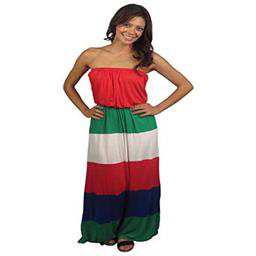

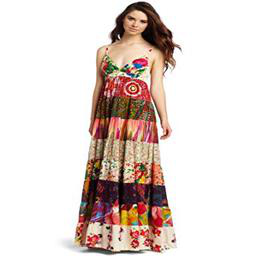

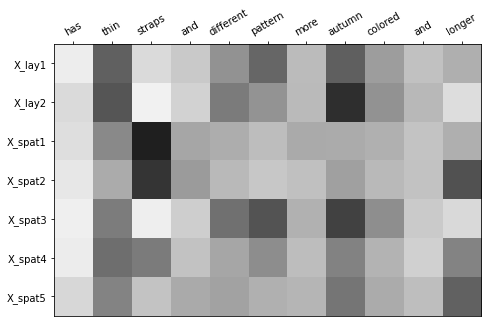

In [40]:
idx=4
plot_weights(meta, weight, idx)

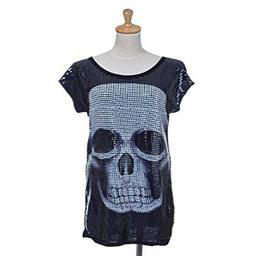

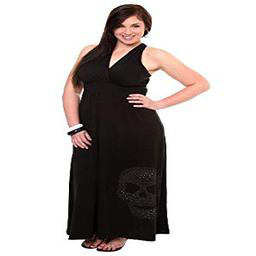

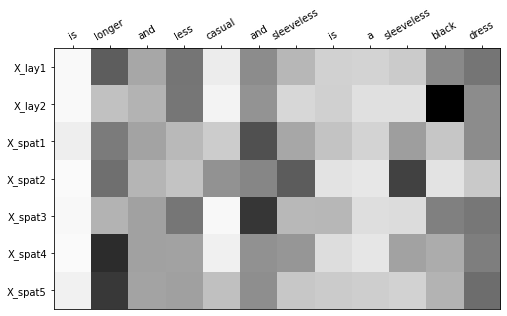

In [31]:
idx = 7 # Change This range: 0 ~ Batch_size
plot_weights(meta, weight, idx)

---

In [33]:
if dataset == 'fashioniq':
    meta, weight = att['dress'][1] # Can change category, idx number
elif dataset == 'shoe':
    meta, weight = att['shoe'][1]
meta[0].keys()

dict_keys(['candidate', 'target', 'captions', 'ranking'])

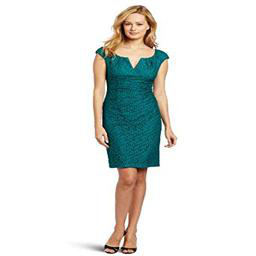

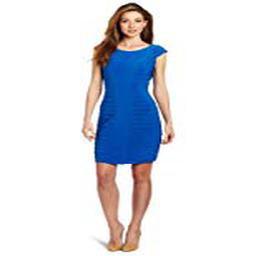

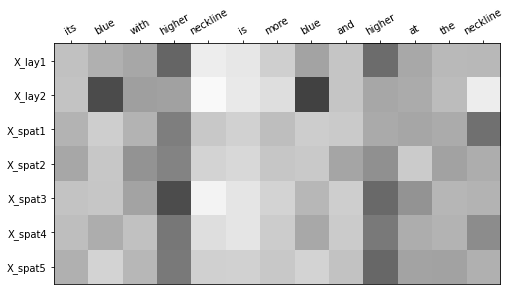

In [34]:
idx=2
plot_weights(meta, weight, idx)